# Tutorial Data-Engineering I - Data Curation

*Note: This lab session is graded. Complete all the exercises, run your code and upload the ipynb file under assignment Tutorial: Web-scraping with Python (https://utexas.instructure.com/courses/1382044/assignments/6618400?module_item_id=13583884) *

**Deadline is Today (02/09), 11:59 PM**

## Data Collection for Weather Analysis

Let's say we want to perform statistical analysis on weather data for EstesPark, Colorado for the month of January 2024. The data is present at the website:  https://www.estesparkweather.net/archive_reports.php?date=202401

We need to automatically scrape the website, extract relevant data, transform it and store it somewhere for further analysis.

We would need the following Python libraries :

**BeautifulSoup:** It is a powerful Python library for pulling out data from HTML/XML files. It creates a parse tree for parsed pages that can be used to extract data from HTML/XML files.

**Requests:** It is a Python HTTP library. It makes HTTP requests simpler. we just need to add the URL as an argument and the get() gets all the information from it.

**Pandas:** This is the library for loading and transforming data in Tablular format

While "requests" is available by default, we would need to install **BeautifulSoup and Pandas**.

## 0. Open the website and look at the source

1. Goto : https://www.estesparkweather.net/archive_reports.php?date=202401 (This is the data for the month of January 2024).
2. Check the page carefully, what kind of data do you need to extract? What kind of values do they contain? Will the data help in your analysis going forward?
3. Check the source (Typically RightClick->View Page Source). Where is your data of interest in the source? What HTML schema/format does data follow?

## 1. Import libraries (install if needed)

These libraries come pre-installed in colab environment. If you are running this code locally, you may need to install the libraries by the following commands:

`pip install bs4`

`pip install pandas`

Let's import all the necessary libraries and functions.

Note: if we do not want to import the entire library (which will obviously consume more memory) but a specific functionality, we can use the `from` import `structure`.

For example, if we want to import the entire `math` library, we know how to import it.

```
import math
```

But if we want to import only `log` function from math and nothing else, we can do that by:

```
from math import log
```



From `bs4` library we only need the `BeautifulSoup` module.

In [ ]:
from bs4 import BeautifulSoup
import pandas
import requests

## 2. Read the webpage and parse it with BeautifulSoup

In [ ]:
opened_webpage = requests.get("https://www.estesparkweather.net/archive_reports.php?date=202401")
print ("Webpage opened successfully...")
print (opened_webpage.content)

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<!-- DW6 -->\n<head>\n<!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->\n<meta http-equiv="Refresh" content="300" />\n<meta http-equiv="Pragma" content="no-cache" />\n<meta http-equiv="Cache-Control" content="no-cache" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n<meta name="ICBM" content="37.27465, -122.02295" />\n<meta name="DC.title" content="Estes Park, Colorado Weather Station" />\n<meta name="author" content="Gregory Truta" />\n<meta name="copyright" content="&copy; 2007 EstesParkWeather.net" />\n<meta name="Keywords" content="weather, Weather, temperature, dew point, humidity, forecast, Davis Vantage Pro, Estes Park Colorado Weather, Colorado Weather, CO Weather, weather conditions, live weather, live weather conditions, weather data, weather hist

## 3. Perform ETL

In the previous class, we discussed ETL, which is a popular data pipeline paradigm. Briefly, the steps are:

**a. Extract:** Get Data from Different Sources Efficiently

**b. Transform:** Perform transformations / calculations on data

**c. Load:** Load the data into the target storage








### 3.1. Extract

Let's extract the data of our interest from the webpage. See, how we are

In [ ]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
tables = bs.find_all("table")

for table in tables:
  row_data = []
  for row in table.find_all('tr'):
    # Extract data from each cell (td) in the row
    # only consider data from two cells, else ignore
    cells =  row.find_all('td')
    if len(cells) == 2:
      row_data.append([cells[0].text.strip(),cells[1].text.strip()])
  raw_data.append(row_data)
print (raw_data)

[[['Average temperature', '26.6°F'], ['Average humidity', '70%'], ['Average dewpoint', '17.3°F'], ['Average barometer', '30.2 in.'], ['Average windspeed', '1.7 mph'], ['Average gustspeed', '2.8 mph'], ['Average direction', '17° (NNE)'], ['Rainfall for month', '0.00 in.'], ['Rainfall for year', '0.00 in.'], ['Maximum rain per minute', '0.00 in. on day 01 at time 00:00'], ['Maximum temperature', '46.3°F on day 01 at time 13:30'], ['Minimum temperature', '14.5°F on day 01 at time 03:57'], ['Maximum humidity', '88% on day 01 at time 05:54'], ['Minimum humidity', '34% on day 01 at time 13:29'], ['Maximum pressure', '30.225 in. on day 01 at time 08:05'], ['Minimum pressure', '30.113 in. on day 01 at time 13:08'], ['Maximum windspeed', '10.4 mph on day 01 at time 13:50'], ['Maximum gust speed', '15.0 mph  from 048 °( NE) on day 01 at time 15:27'], ['Maximum heat index', '46.3°F on day 01 at time 13:30']], [['Average temperature', '27.7°F'], ['Average humidity', '58%'], ['Average dewpoint', '1

As we can see, `BeautifulSoup` has done majority of the parsing job and the `raw_data` is quite interpretable. But it is far from the list-of-list that we desire.

### 3.2. Transform

As we can see, the data is not in a great shape. But the good news is that we have everything in the form of a list. We can now use basic python operations that we discussed in the first and second hands-on to transform our data

But before that, let's ask this question. In what way I could transform the data so that it could be useful for further analysis?

Well, we wish we had the data in the following table format...

```
| Date       | Average Temperature | Average Humidity | Average Dewpoint | Average Barometer | Maximum Heat Index |
|------------|---------------------|------------------|------------------|------------------|---------------------|
| Jan 1       | 28.5               | 83               | 23.9             | 29.7             | 36.1               |
| Jan 2       | 20.4               | 92               | 18.5             | 29.7             | 23.8               |
| Jan 3       | 21.8               | 68               | 12.1             | 29.8             | 31.2               |
| ...         | ...                | ...              | ...              | ...              | ...                |
| Jan 31      | 16.6               | 42               | -3.5             | 30.3             | 26.0               |
```

In general, a good file format to save this kind of tabular data is **Comma Separated Values (CSV)**

Now let's work towards transforming our data. Our steps could be:

- Define a list of columns and store the column names in the list
- Extract one row from raw data at a time, make a list representing the row.
- Add all rows one after another to make a big list of list.
- Convert the data in the form of a list of list into a DataFrame.

In [ ]:
column_names = ["Average temperature",
           "Average humidity","Average dewpoint",
           "Average barometer","Average windspeed",
           "Average gustspeed","Average direction",
           "Rainfall for month","Rainfall for year",
           "Maximum rain per minute","Maximum temperature",
           "Minimum temperature","Maximum humidity",
           "Minimum humidity","Maximum pressure",
           "Minimum pressure","Maximum windspeed",
           "Maximum gust speed","Maximum heat index"]


final_data = []

for day_wise_data in raw_data:
  # this for loop is for days - Jan 1, Jan 2 ...
  # we construct the inner list of the list of list that we desire to build, let's call it "day_wise_row"
  day_wise_row = []
  for entry in day_wise_data:
    # this for loop is for entries - Average temperature, Average dewpoint ...
    # this will always have a tiny list with two elements
    # e.g., ["Average temperature", "26.6F"]
    # we care about only the value and not the name of the column, which is separately defined above
    value = entry[1]
    day_wise_row.append(value)

  # only add valid columns to the final data
  # valid columns should have same number of entries as the "column names" defined above

  if len(column_names) == len(day_wise_row):
    final_data.append(day_wise_row)


# Sanity check - let's print the first 5 rows
print(final_data[:5])

[['26.6°F', '70%', '17.3°F', '30.2 in.', '1.7 mph', '2.8 mph', '17° (NNE)', '0.00 in.', '0.00 in.', '0.00 in. on day 01 at time 00:00', '46.3°F on day 01 at time 13:30', '14.5°F on day 01 at time 03:57', '88% on day 01 at time 05:54', '34% on day 01 at time 13:29', '30.225 in. on day 01 at time 08:05', '30.113 in. on day 01 at time 13:08', '10.4 mph on day 01 at time 13:50', '15.0 mph  from 048 °( NE) on day 01 at time 15:27', '46.3°F on day 01 at time 13:30'], ['27.7°F', '58%', '12.9°F', '30.2 in.', '4.2 mph', '6.3 mph', '171° ( S )', '0.00 in.', '0.00 in.', '0.00 in. on day 02 at time 23:59', '42.5°F on day 02 at time 12:08', '10.6°F on day 02 at time 07:12', '91% on day 02 at time 08:18', '30% on day 02 at time 12:20', '30.238 in. on day 02 at time 07:13', '30.071 in. on day 02 at time 23:57', '16.1 mph on day 02 at time 13:43', '23.0 mph  from 146 °( SE) on day 02 at time 15:02', '42.5°F on day 02 at time 12:08'], ['25.9°F', '53%', '10.0°F', '30.0 in.', '3.1 mph', '4.9 mph', '232° 

#### Convert to DataFrame

A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. DataFrames are one of the most common data structures used in modern data analytics because they are a flexible and intuitive way of storing and working with data.

We use **Pandas** to convert our data into dataframe

In [ ]:
final_data = pandas.DataFrame(final_data, columns=column_names)

# We can visualize the table in colab by just mentioning the variable name
final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.6°F,70%,17.3°F,30.2 in.,1.7 mph,2.8 mph,17° (NNE),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,46.3°F on day 01 at time 13:30,14.5°F on day 01 at time 03:57,88% on day 01 at time 05:54,34% on day 01 at time 13:29,30.225 in. on day 01 at time 08:05,30.113 in. on day 01 at time 13:08,10.4 mph on day 01 at time 13:50,15.0 mph from 048 °( NE) on day 01 at time 15:27,46.3°F on day 01 at time 13:30
1,27.7°F,58%,12.9°F,30.2 in.,4.2 mph,6.3 mph,171° ( S ),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,42.5°F on day 02 at time 12:08,10.6°F on day 02 at time 07:12,91% on day 02 at time 08:18,30% on day 02 at time 12:20,30.238 in. on day 02 at time 07:13,30.071 in. on day 02 at time 23:57,16.1 mph on day 02 at time 13:43,23.0 mph from 146 °( SE) on day 02 at time 15:02,42.5°F on day 02 at time 12:08
2,25.9°F,53%,10.0°F,30.0 in.,3.1 mph,4.9 mph,232° ( SW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,41.3°F on day 03 at time 14:04,15.0°F on day 03 at time 07:46,77% on day 03 at time 23:59,21% on day 03 at time 14:02,30.071 in. on day 03 at time 00:01,29.894 in. on day 03 at time 14:32,17.3 mph on day 03 at time 12:01,26.5 mph from 221 °( SW) on day 03 at time 12:00,41.3°F on day 03 at time 14:04
3,23.8°F,72%,15.3°F,29.9 in.,1.4 mph,2.6 mph,64° (ENE),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,35.6°F on day 04 at time 13:44,16.5°F on day 04 at time 01:32,91% on day 04 at time 23:20,40% on day 04 at time 13:07,29.966 in. on day 04 at time 00:01,29.834 in. on day 04 at time 16:03,11.5 mph on day 04 at time 14:31,15.0 mph from 07 °( N ) on day 04 at time 14:30,35.6°F on day 04 at time 13:44
4,21.7°F,63%,9.9°F,29.9 in.,4.7 mph,7.1 mph,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 05 at time 23:59,30.9°F on day 05 at time 12:45,12.6°F on day 05 at time 07:01,89% on day 05 at time 07:42,36% on day 05 at time 16:01,29.939 in. on day 05 at time 23:54,29.814 in. on day 05 at time 12:51,20.7 mph on day 05 at time 12:55,27.6 mph from 238 °(WSW) on day 05 at time 13:20,30.9°F on day 05 at time 12:45
5,18.0°F,52%,2.2°F,29.9 in.,6.8 mph,10.2 mph,258° (WSW),0.00 in.,0.00 in.,0.00 in. on day 06 at time 23:59,27.5°F on day 06 at time 12:42,4.7°F on day 06 at time 06:45,81% on day 06 at time 07:37,28% on day 06 at time 11:37,29.989 in. on day 06 at time 06:13,29.842 in. on day 06 at time 17:49,21.9 mph on day 06 at time 13:34,31.1 mph from 146 °( SE) on day 06 at time 18:16,27.5°F on day 06 at time 12:42
6,18.2°F,59%,5.7°F,29.7 in.,2.0 mph,3.3 mph,36° ( NE),0.00 in.,0.00 in.,0.00 in. on day 07 at time 23:59,29.1°F on day 07 at time 12:56,9.2°F on day 07 at time 05:28,82% on day 07 at time 23:59,35% on day 07 at time 13:50,29.847 in. on day 07 at time 00:01,29.559 in. on day 07 at time 14:11,10.4 mph on day 07 at time 15:19,13.8 mph from 047 °( NE) on day 07 at time 15:24,29.1°F on day 07 at time 12:56
7,16.0°F,60%,3.1°F,29.9 in.,5.1 mph,8.1 mph,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 08 at time 23:59,27.2°F on day 08 at time 14:09,5.6°F on day 08 at time 07:47,88% on day 08 at time 08:25,33% on day 08 at time 15:39,30.052 in. on day 08 at time 20:42,29.733 in. on day 08 at time 00:31,20.7 mph on day 08 at time 21:56,33.4 mph from 274 °( W ) on day 08 at time 23:24,27.2°F on day 08 at time 14:09
8,21.8°F,48%,4.5°F,29.8 in.,15.7 mph,22.1 mph,245° (WSW),0.00 in.,0.00 in.,0.00 in. on day 09 at time 23:59,31.6°F on day 09 at time 14:24,13.5°F on day 09 at time 02:11,84% on day 09 at time 22:29,28% on day 09 at time 02:47,29.982 in. on day 09 at time 00:01,29.523 in. on day 09 at time 23:39,32.2 mph on day 09 at time 12:23,46.0 mph from 291 °(WNW) on day 09 at time 12:25,31.6°F on day 09

At this point we have transformed our data into a decent form. We can choose to store it or do a bit more cleaning and then store.

Some basic cleaning that we can do:

- Does the data contain any duplicate rows? If yes, remove them.
- Does the data contain any NULL entries? If yes, then replace the entry with a default value (we can even remove the row completely).

And some basic statistical analysis before storing the data


#### Duplication Checks and Cleaning

In [ ]:

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Average temperature      31 non-null     object
 1   Average humidity         31 non-null     object
 2   Average dewpoint         31 non-null     object
 3   Average barometer        31 non-null     object
 4   Average windspeed        31 non-null     object
 5   Average gustspeed        31 non-null     object
 6   Average direction        31 non-null     object
 7   Rainfall for month       31 non-null     object
 8   Rainfall for year        31 non-null     object
 9   Maximum rain per minute  31 non-null     object
 10  Maximum temperature      31 non-null     object
 11  Minimum temperature      31 non-null     object
 12  Maximum humidity         31 non-null     object
 13  Minimum humidity         31 non-null     object
 14  Maximum pressure         31 non-null     obj

We can see that the data has 31 rows overall and 31 non-null entries. We need not perform any cleaning. Still, we should learn how to clean / remove rows that have atleast one NULL entry. The `dropna()` method precisely does that.

In [ ]:
final_data = final_data.dropna()
final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.6°F,70%,17.3°F,30.2 in.,1.7 mph,2.8 mph,17° (NNE),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,46.3°F on day 01 at time 13:30,14.5°F on day 01 at time 03:57,88% on day 01 at time 05:54,34% on day 01 at time 13:29,30.225 in. on day 01 at time 08:05,30.113 in. on day 01 at time 13:08,10.4 mph on day 01 at time 13:50,15.0 mph from 048 °( NE) on day 01 at time 15:27,46.3°F on day 01 at time 13:30
1,27.7°F,58%,12.9°F,30.2 in.,4.2 mph,6.3 mph,171° ( S ),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,42.5°F on day 02 at time 12:08,10.6°F on day 02 at time 07:12,91% on day 02 at time 08:18,30% on day 02 at time 12:20,30.238 in. on day 02 at time 07:13,30.071 in. on day 02 at time 23:57,16.1 mph on day 02 at time 13:43,23.0 mph from 146 °( SE) on day 02 at time 15:02,42.5°F on day 02 at time 12:08
2,25.9°F,53%,10.0°F,30.0 in.,3.1 mph,4.9 mph,232° ( SW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,41.3°F on day 03 at time 14:04,15.0°F on day 03 at time 07:46,77% on day 03 at time 23:59,21% on day 03 at time 14:02,30.071 in. on day 03 at time 00:01,29.894 in. on day 03 at time 14:32,17.3 mph on day 03 at time 12:01,26.5 mph from 221 °( SW) on day 03 at time 12:00,41.3°F on day 03 at time 14:04
3,23.8°F,72%,15.3°F,29.9 in.,1.4 mph,2.6 mph,64° (ENE),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,35.6°F on day 04 at time 13:44,16.5°F on day 04 at time 01:32,91% on day 04 at time 23:20,40% on day 04 at time 13:07,29.966 in. on day 04 at time 00:01,29.834 in. on day 04 at time 16:03,11.5 mph on day 04 at time 14:31,15.0 mph from 07 °( N ) on day 04 at time 14:30,35.6°F on day 04 at time 13:44
4,21.7°F,63%,9.9°F,29.9 in.,4.7 mph,7.1 mph,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 05 at time 23:59,30.9°F on day 05 at time 12:45,12.6°F on day 05 at time 07:01,89% on day 05 at time 07:42,36% on day 05 at time 16:01,29.939 in. on day 05 at time 23:54,29.814 in. on day 05 at time 12:51,20.7 mph on day 05 at time 12:55,27.6 mph from 238 °(WSW) on day 05 at time 13:20,30.9°F on day 05 at time 12:45
5,18.0°F,52%,2.2°F,29.9 in.,6.8 mph,10.2 mph,258° (WSW),0.00 in.,0.00 in.,0.00 in. on day 06 at time 23:59,27.5°F on day 06 at time 12:42,4.7°F on day 06 at time 06:45,81% on day 06 at time 07:37,28% on day 06 at time 11:37,29.989 in. on day 06 at time 06:13,29.842 in. on day 06 at time 17:49,21.9 mph on day 06 at time 13:34,31.1 mph from 146 °( SE) on day 06 at time 18:16,27.5°F on day 06 at time 12:42
6,18.2°F,59%,5.7°F,29.7 in.,2.0 mph,3.3 mph,36° ( NE),0.00 in.,0.00 in.,0.00 in. on day 07 at time 23:59,29.1°F on day 07 at time 12:56,9.2°F on day 07 at time 05:28,82% on day 07 at time 23:59,35% on day 07 at time 13:50,29.847 in. on day 07 at time 00:01,29.559 in. on day 07 at time 14:11,10.4 mph on day 07 at time 15:19,13.8 mph from 047 °( NE) on day 07 at time 15:24,29.1°F on day 07 at time 12:56
7,16.0°F,60%,3.1°F,29.9 in.,5.1 mph,8.1 mph,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 08 at time 23:59,27.2°F on day 08 at time 14:09,5.6°F on day 08 at time 07:47,88% on day 08 at time 08:25,33% on day 08 at time 15:39,30.052 in. on day 08 at time 20:42,29.733 in. on day 08 at time 00:31,20.7 mph on day 08 at time 21:56,33.4 mph from 274 °( W ) on day 08 at time 23:24,27.2°F on day 08 at time 14:09
8,21.8°F,48%,4.5°F,29.8 in.,15.7 mph,22.1 mph,245° (WSW),0.00 in.,0.00 in.,0.00 in. on day 09 at time 23:59,31.6°F on day 09 at time 14:24,13.5°F on day 09 at time 02:11,84% on day 09 at time 22:29,28% on day 09 at time 02:47,29.982 in. on day 09 at time 00:01,29.523 in. on day 09 at time 23:39,32.2 mph on day 09 at time 12:23,46.0 mph from 291 °(WNW) on day 09 at time 12:25,31.6°F on day 09

Here, no change was expected and that's what we see. However, in general `dropna()` whould be applied regardless of the situation - just to be on the safer side.

**[Additional Transformations]** We can remove unnecessary strings (e.g. "F" for fahrenheit) and "%" Symbol and convert these columns into integer/float


In [ ]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("°F","")
    s = s.replace("in.","")
    s = s.replace("mph","")
    converted = float(s)
    return converted

final_data["Average temperature"] = final_data["Average temperature"].apply(clearn_string_and_convert)
final_data["Average humidity"] = final_data["Average humidity"].apply(clearn_string_and_convert)
final_data["Average dewpoint"] = final_data["Average dewpoint"].apply(clearn_string_and_convert)
final_data["Average barometer"] = final_data["Average barometer"].apply(clearn_string_and_convert)
final_data["Average windspeed"] = final_data["Average windspeed"].apply(clearn_string_and_convert)
final_data["Average gustspeed"] = final_data["Average gustspeed"].apply(clearn_string_and_convert)

final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.6,70.0,17.3,30.2,1.7,2.8,17° (NNE),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,46.3°F on day 01 at time 13:30,14.5°F on day 01 at time 03:57,88% on day 01 at time 05:54,34% on day 01 at time 13:29,30.225 in. on day 01 at time 08:05,30.113 in. on day 01 at time 13:08,10.4 mph on day 01 at time 13:50,15.0 mph from 048 °( NE) on day 01 at time 15:27,46.3°F on day 01 at time 13:30
1,27.7,58.0,12.9,30.2,4.2,6.3,171° ( S ),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,42.5°F on day 02 at time 12:08,10.6°F on day 02 at time 07:12,91% on day 02 at time 08:18,30% on day 02 at time 12:20,30.238 in. on day 02 at time 07:13,30.071 in. on day 02 at time 23:57,16.1 mph on day 02 at time 13:43,23.0 mph from 146 °( SE) on day 02 at time 15:02,42.5°F on day 02 at time 12:08
2,25.9,53.0,10.0,30.0,3.1,4.9,232° ( SW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,41.3°F on day 03 at time 14:04,15.0°F on day 03 at time 07:46,77% on day 03 at time 23:59,21% on day 03 at time 14:02,30.071 in. on day 03 at time 00:01,29.894 in. on day 03 at time 14:32,17.3 mph on day 03 at time 12:01,26.5 mph from 221 °( SW) on day 03 at time 12:00,41.3°F on day 03 at time 14:04
3,23.8,72.0,15.3,29.9,1.4,2.6,64° (ENE),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,35.6°F on day 04 at time 13:44,16.5°F on day 04 at time 01:32,91% on day 04 at time 23:20,40% on day 04 at time 13:07,29.966 in. on day 04 at time 00:01,29.834 in. on day 04 at time 16:03,11.5 mph on day 04 at time 14:31,15.0 mph from 07 °( N ) on day 04 at time 14:30,35.6°F on day 04 at time 13:44
4,21.7,63.0,9.9,29.9,4.7,7.1,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 05 at time 23:59,30.9°F on day 05 at time 12:45,12.6°F on day 05 at time 07:01,89% on day 05 at time 07:42,36% on day 05 at time 16:01,29.939 in. on day 05 at time 23:54,29.814 in. on day 05 at time 12:51,20.7 mph on day 05 at time 12:55,27.6 mph from 238 °(WSW) on day 05 at time 13:20,30.9°F on day 05 at time 12:45
5,18.0,52.0,2.2,29.9,6.8,10.2,258° (WSW),0.00 in.,0.00 in.,0.00 in. on day 06 at time 23:59,27.5°F on day 06 at time 12:42,4.7°F on day 06 at time 06:45,81% on day 06 at time 07:37,28% on day 06 at time 11:37,29.989 in. on day 06 at time 06:13,29.842 in. on day 06 at time 17:49,21.9 mph on day 06 at time 13:34,31.1 mph from 146 °( SE) on day 06 at time 18:16,27.5°F on day 06 at time 12:42
6,18.2,59.0,5.7,29.7,2.0,3.3,36° ( NE),0.00 in.,0.00 in.,0.00 in. on day 07 at time 23:59,29.1°F on day 07 at time 12:56,9.2°F on day 07 at time 05:28,82% on day 07 at time 23:59,35% on day 07 at time 13:50,29.847 in. on day 07 at time 00:01,29.559 in. on day 07 at time 14:11,10.4 mph on day 07 at time 15:19,13.8 mph from 047 °( NE) on day 07 at time 15:24,29.1°F on day 07 at time 12:56
7,16.0,60.0,3.1,29.9,5.1,8.1,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 08 at time 23:59,27.2°F on day 08 at time 14:09,5.6°F on day 08 at time 07:47,88% on day 08 at time 08:25,33% on day 08 at time 15:39,30.052 in. on day 08 at time 20:42,29.733 in. on day 08 at time 00:31,20.7 mph on day 08 at time 21:56,33.4 mph from 274 °( W ) on day 08 at time 23:24,27.2°F on day 08 at time 14:09
8,21.8,48.0,4.5,29.8,15.7,22.1,245° (WSW),0.00 in.,0.00 in.,0.00 in. on day 09 at time 23:59,31.6°F on day 09 at time 14:24,13.5°F on day 09 at time 02:11,84% on day 09 at time 22:29,28% on day 09 at time 02:47,29.982 in. on day 09 at time 00:01,29.523 in. on day 09 at time 23:39,32.2 mph on day 09 at time 12:23,46.0 mph from 291 °(WNW) on day 09 at time 12:25,31.6°F on day 09 at time 14:24
9,19.5,55.0,5.4,29.5,7.4,11.5,271° ( W ),0.00 in.,0.00 in.,0.00 in. on day 10 at time 23:59,24.6°F on day 10 at time 12:

**[Optional]** Describe some of your columns

In [ ]:
final_data["Average temperature"].describe()

count    31.000000
mean     24.116129
std       9.534922
min      -1.000000
25%      18.400000
50%      25.900000
75%      30.300000
max      40.700000
Name: Average temperature, dtype: float64

**[Optional]** Plot a histogram of a column

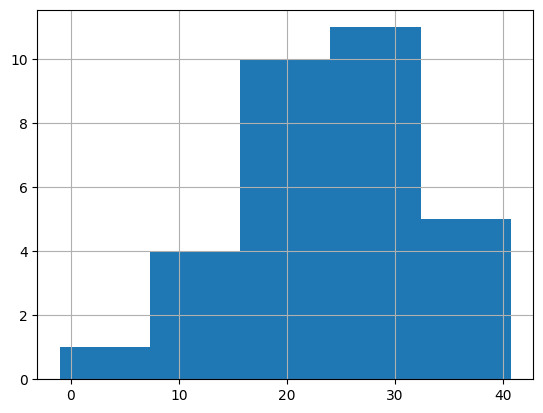

In [ ]:
hist = final_data["Average temperature"].hist(bins=5)

We will look into visualizations in the next hands-on

### 3.3 Load

Now, let's store the DataFrame table that we created on our local disk so that we can use it later. We choose to convert it to a CSV format. It is quite simple with Pandas dataframes.

In [ ]:
final_data.to_csv("EstesPark_Weather_August_2023.csv")

## Exercise E1: ETL data for January 2014

Create a new code block below and carry out the following *(you can copy code from above but for maximizing understanding, copy one block at a time, make changes, execute and write down your observations in a markdown block)*.

Tasks:

- Repeat the steps shown in section 2 and 3 above for January 2014.
- Extract January 2014 data from https://www.estesparkweather.net/archive_reports.php?date=201401
- Perform transform steps in the same way as shown in 3.2 and save the data on your laptop.
- Describe "Average temperature" using `describe()` function shown under 3.2. What differences do you see between January 2014 and January 2024. Can you say that global warming is real based on the temperature data?

In [ ]:
opened_webpage = requests.get("https://www.estesparkweather.net/archive_reports.php?date=201401")
print ("Webpage opened successfully...")
print (opened_webpage.content)

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<!-- DW6 -->\n<head>\n<!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->\n<meta http-equiv="Refresh" content="300" />\n<meta http-equiv="Pragma" content="no-cache" />\n<meta http-equiv="Cache-Control" content="no-cache" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n<meta name="ICBM" content="37.27465, -122.02295" />\n<meta name="DC.title" content="Estes Park, Colorado Weather Station" />\n<meta name="author" content="Gregory Truta" />\n<meta name="copyright" content="&copy; 2007 EstesParkWeather.net" />\n<meta name="Keywords" content="weather, Weather, temperature, dew point, humidity, forecast, Davis Vantage Pro, Estes Park Colorado Weather, Colorado Weather, CO Weather, weather conditions, live weather, live weather conditions, weather data, weather hist

In [ ]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
tables = bs.find_all("table")

for table in tables:
  row_data = []
  for row in table.find_all('tr'):
    # Extract data from each cell (td) in the row
    # only consider data from two cells, else ignore
    cells =  row.find_all('td')
    if len(cells) == 2:
      row_data.append([cells[0].text.strip(),cells[1].text.strip()])
  raw_data.append(row_data)
print (raw_data)

[[['Average temperature', '26.9°F'], ['Average humidity', '57%'], ['Average dewpoint', '13.4°F'], ['Average barometer', '30.1 in.'], ['Average windspeed', '5.6 mph'], ['Average gustspeed', '8.7 mph'], ['Average direction', '268° ( W )'], ['Rainfall for month', '0.00 in.'], ['Rainfall for year', '0.00 in.'], ['Maximum rain per minute', '0.00 in. on day 01 at time 00:00'], ['Maximum temperature', '34.6°F on day 01 at time 00:01'], ['Minimum temperature', '15.9°F on day 01 at time 21:05'], ['Maximum humidity', '88% on day 01 at time 03:05'], ['Minimum humidity', '33% on day 01 at time 10:26'], ['Maximum pressure', '30.383 in. on day 01 at time 21:14'], ['Minimum pressure', '29.843 in. on day 01 at time 01:14'], ['Maximum windspeed', '18.4 mph on day 00 at time 00:45'], ['Maximum gust speed', '29.9 mph  from 248 °(WSW) on day 01 at time 00:46'], ['Maximum heat index', '34.6°F on day 01 at time 00:01']], [['Average temperature', '35.2°F'], ['Average humidity', '30%'], ['Average dewpoint', '

In [ ]:
column_names = ["Average temperature",
           "Average humidity","Average dewpoint",
           "Average barometer","Average windspeed",
           "Average gustspeed","Average direction",
           "Rainfall for month","Rainfall for year",
           "Maximum rain per minute","Maximum temperature",
           "Minimum temperature","Maximum humidity",
           "Minimum humidity","Maximum pressure",
           "Minimum pressure","Maximum windspeed",
           "Maximum gust speed","Maximum heat index"]


final_data = []

for day_wise_data in raw_data:
  # this for loop is for days - Jan 1, Jan 2 ...
  # we construct the inner list of the list of list that we desire to build, let's call it "day_wise_row"
  day_wise_row = []
  for entry in day_wise_data:
    # this for loop is for entries - Average temperature, Average dewpoint ...
    # this will always have a tiny list with two elements
    # e.g., ["Average temperature", "26.6F"]
    # we care about only the value and not the name of the column, which is separately defined above
    value = entry[1]
    day_wise_row.append(value)

  # only add valid columns to the final data
  # valid columns should have same number of entries as the "column names" defined above

  if len(column_names) == len(day_wise_row):
    final_data.append(day_wise_row)


# Sanity check - let's print the first 5 rows
print(final_data[:5])

[['26.9°F', '57%', '13.4°F', '30.1 in.', '5.6 mph', '8.7 mph', '268° ( W )', '0.00 in.', '0.00 in.', '0.00 in. on day 01 at time 00:00', '34.6°F on day 01 at time 00:01', '15.9°F on day 01 at time 21:05', '88% on day 01 at time 03:05', '33% on day 01 at time 10:26', '30.383 in. on day 01 at time 21:14', '29.843 in. on day 01 at time 01:14', '18.4 mph on day 00 at time 00:45', '29.9 mph  from 248 °(WSW) on day 01 at time 00:46', '34.6°F on day 01 at time 00:01'], ['35.2°F', '30%', '6.3°F', '30.2 in.', '12.5 mph', '17.8 mph', '237° (WSW)', '0.00 in.', '0.00 in.', '0.00 in. on day 02 at time 23:59', '44.6°F on day 02 at time 13:55', '18.0°F on day 02 at time 00:39', '70% on day 02 at time 00:16', '19% on day 02 at time 11:23', '30.338 in. on day 02 at time 07:29', '29.886 in. on day 02 at time 23:44', '24.2 mph on day 02 at time 15:10', '34.5 mph  from 248 °(WSW) on day 02 at time 15:09', '44.6°F on day 02 at time 13:55'], ['39.4°F', '30%', '10.3°F', '29.7 in.', '16.3 mph', '23.0 mph', '2

In [ ]:
final_data = pandas.DataFrame(final_data, columns=column_names)

# We can visualize the table in colab by just mentioning the variable name
final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.9°F,57%,13.4°F,30.1 in.,5.6 mph,8.7 mph,268° ( W ),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,34.6°F on day 01 at time 00:01,15.9°F on day 01 at time 21:05,88% on day 01 at time 03:05,33% on day 01 at time 10:26,30.383 in. on day 01 at time 21:14,29.843 in. on day 01 at time 01:14,18.4 mph on day 00 at time 00:45,29.9 mph from 248 °(WSW) on day 01 at time 00:46,34.6°F on day 01 at time 00:01
1,35.2°F,30%,6.3°F,30.2 in.,12.5 mph,17.8 mph,237° (WSW),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,44.6°F on day 02 at time 13:55,18.0°F on day 02 at time 00:39,70% on day 02 at time 00:16,19% on day 02 at time 11:23,30.338 in. on day 02 at time 07:29,29.886 in. on day 02 at time 23:44,24.2 mph on day 02 at time 15:10,34.5 mph from 248 °(WSW) on day 02 at time 15:09,44.6°F on day 02 at time 13:55
2,39.4°F,30%,10.3°F,29.7 in.,16.3 mph,23.0 mph,243° (WSW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,45.8°F on day 03 at time 15:21,31.9°F on day 03 at time 23:59,64% on day 03 at time 23:59,20% on day 03 at time 15:32,29.902 in. on day 03 at time 00:30,29.474 in. on day 03 at time 15:59,33.4 mph on day 03 at time 10:48,43.7 mph from 248 °(WSW) on day 03 at time 11:16,45.8°F on day 03 at time 15:21
3,12.0°F,80%,7.1°F,30.0 in.,2.5 mph,4.2 mph,81° ( E ),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,31.9°F on day 04 at time 00:01,-5.4°F on day 04 at time 23:11,87% on day 04 at time 02:38,64% on day 04 at time 00:01,30.427 in. on day 04 at time 23:14,29.556 in. on day 04 at time 02:29,13.8 mph on day 04 at time 02:56,21.9 mph from 113 °(ESE) on day 04 at time 03:09,31.9°F on day 04 at time 00:01
4,3.3°F,71%,-4.1°F,30.5 in.,3.3 mph,5.5 mph,346° (NNW),0.01 in.,0.01 in.,0.01 in. on day 05 at time 14:07,13.4°F on day 05 at time 13:47,-5.2°F on day 05 at time 00:38,78% on day 05 at time 05:28,56% on day 05 at time 23:59,30.723 in. on day 05 at time 20:59,30.340 in. on day 05 at time 03:59,16.1 mph on day 05 at time 18:23,26.5 mph from 023 °(NNE) on day 05 at time 15:29,13.4°F on day 05 at time 13:47
5,22.0°F,40%,0.9°F,30.3 in.,13.1 mph,18.8 mph,238° (WSW),0.03 in.,0.03 in.,0.01 in. on day 06 at time 23:22,55.4°F on day 06 at time 20:18,5.6°F on day 06 at time 00:16,90% on day 06 at time 20:18,30% on day 06 at time 23:57,30.558 in. on day 06 at time 06:44,29.914 in. on day 06 at time 20:18,29.9 mph on day 06 at time 17:01,39.1 mph from 225 °( SW) on day 06 at time 16:04,55.4°F on day 06 at time 20:18
6,32.1°F,35%,6.1°F,30.0 in.,6.9 mph,10.3 mph,253° (WSW),0.03 in.,0.03 in.,0.00 in. on day 07 at time 23:59,41.7°F on day 07 at time 14:10,25.6°F on day 07 at time 19:08,67% on day 07 at time 23:25,20% on day 07 at time 05:27,30.173 in. on day 07 at time 07:14,29.869 in. on day 07 at time 14:14,21.9 mph on day 06 at time 00:20,31.1 mph from 270 °( W ) on day 07 at time 00:11,41.7°F on day 07 at time 14:10
7,27.5°F,54%,12.2°F,30.0 in.,6.0 mph,8.7 mph,259° (WSW),0.03 in.,0.03 in.,0.00 in. on day 08 at time 23:59,36.3°F on day 08 at time 12:47,13.6°F on day 08 at time 07:42,78% on day 08 at time 07:54,35% on day 08 at time 13:00,30.172 in. on day 08 at time 07:14,29.889 in. on day 08 at time 01:29,18.4 mph on day 08 at time 11:56,24.2 mph from 225 °( SW) on day 08 at time 11:55,36.3°F on day 08 at time 12:47
8,29.9°F,47%,11.7°F,29.8 in.,12.6 mph,18.6 mph,252° (WSW),0.03 in.,0.03 in.,0.00 in. on day 09 at time 23:59,34.1°F on day 09 at time 12:04,22.2°F on day 09 at time 23:59,84% on day 09 at time 22:10,36% on day 09 at time 12:06,29.912 in. on day 09 at time 00:01,29.692 in. on day 09 at time 13:59,26.5 mph on day 09 at time 14:09,34.5 mph from 248 °(WSW) on day 09 at time 17:07,34.1°

In [ ]:

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Average temperature      31 non-null     object
 1   Average humidity         31 non-null     object
 2   Average dewpoint         31 non-null     object
 3   Average barometer        31 non-null     object
 4   Average windspeed        31 non-null     object
 5   Average gustspeed        31 non-null     object
 6   Average direction        31 non-null     object
 7   Rainfall for month       31 non-null     object
 8   Rainfall for year        31 non-null     object
 9   Maximum rain per minute  31 non-null     object
 10  Maximum temperature      31 non-null     object
 11  Minimum temperature      31 non-null     object
 12  Maximum humidity         31 non-null     object
 13  Minimum humidity         31 non-null     object
 14  Maximum pressure         31 non-null     obj

In [ ]:
final_data = final_data.dropna()
final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.9°F,57%,13.4°F,30.1 in.,5.6 mph,8.7 mph,268° ( W ),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,34.6°F on day 01 at time 00:01,15.9°F on day 01 at time 21:05,88% on day 01 at time 03:05,33% on day 01 at time 10:26,30.383 in. on day 01 at time 21:14,29.843 in. on day 01 at time 01:14,18.4 mph on day 00 at time 00:45,29.9 mph from 248 °(WSW) on day 01 at time 00:46,34.6°F on day 01 at time 00:01
1,35.2°F,30%,6.3°F,30.2 in.,12.5 mph,17.8 mph,237° (WSW),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,44.6°F on day 02 at time 13:55,18.0°F on day 02 at time 00:39,70% on day 02 at time 00:16,19% on day 02 at time 11:23,30.338 in. on day 02 at time 07:29,29.886 in. on day 02 at time 23:44,24.2 mph on day 02 at time 15:10,34.5 mph from 248 °(WSW) on day 02 at time 15:09,44.6°F on day 02 at time 13:55
2,39.4°F,30%,10.3°F,29.7 in.,16.3 mph,23.0 mph,243° (WSW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,45.8°F on day 03 at time 15:21,31.9°F on day 03 at time 23:59,64% on day 03 at time 23:59,20% on day 03 at time 15:32,29.902 in. on day 03 at time 00:30,29.474 in. on day 03 at time 15:59,33.4 mph on day 03 at time 10:48,43.7 mph from 248 °(WSW) on day 03 at time 11:16,45.8°F on day 03 at time 15:21
3,12.0°F,80%,7.1°F,30.0 in.,2.5 mph,4.2 mph,81° ( E ),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,31.9°F on day 04 at time 00:01,-5.4°F on day 04 at time 23:11,87% on day 04 at time 02:38,64% on day 04 at time 00:01,30.427 in. on day 04 at time 23:14,29.556 in. on day 04 at time 02:29,13.8 mph on day 04 at time 02:56,21.9 mph from 113 °(ESE) on day 04 at time 03:09,31.9°F on day 04 at time 00:01
4,3.3°F,71%,-4.1°F,30.5 in.,3.3 mph,5.5 mph,346° (NNW),0.01 in.,0.01 in.,0.01 in. on day 05 at time 14:07,13.4°F on day 05 at time 13:47,-5.2°F on day 05 at time 00:38,78% on day 05 at time 05:28,56% on day 05 at time 23:59,30.723 in. on day 05 at time 20:59,30.340 in. on day 05 at time 03:59,16.1 mph on day 05 at time 18:23,26.5 mph from 023 °(NNE) on day 05 at time 15:29,13.4°F on day 05 at time 13:47
5,22.0°F,40%,0.9°F,30.3 in.,13.1 mph,18.8 mph,238° (WSW),0.03 in.,0.03 in.,0.01 in. on day 06 at time 23:22,55.4°F on day 06 at time 20:18,5.6°F on day 06 at time 00:16,90% on day 06 at time 20:18,30% on day 06 at time 23:57,30.558 in. on day 06 at time 06:44,29.914 in. on day 06 at time 20:18,29.9 mph on day 06 at time 17:01,39.1 mph from 225 °( SW) on day 06 at time 16:04,55.4°F on day 06 at time 20:18
6,32.1°F,35%,6.1°F,30.0 in.,6.9 mph,10.3 mph,253° (WSW),0.03 in.,0.03 in.,0.00 in. on day 07 at time 23:59,41.7°F on day 07 at time 14:10,25.6°F on day 07 at time 19:08,67% on day 07 at time 23:25,20% on day 07 at time 05:27,30.173 in. on day 07 at time 07:14,29.869 in. on day 07 at time 14:14,21.9 mph on day 06 at time 00:20,31.1 mph from 270 °( W ) on day 07 at time 00:11,41.7°F on day 07 at time 14:10
7,27.5°F,54%,12.2°F,30.0 in.,6.0 mph,8.7 mph,259° (WSW),0.03 in.,0.03 in.,0.00 in. on day 08 at time 23:59,36.3°F on day 08 at time 12:47,13.6°F on day 08 at time 07:42,78% on day 08 at time 07:54,35% on day 08 at time 13:00,30.172 in. on day 08 at time 07:14,29.889 in. on day 08 at time 01:29,18.4 mph on day 08 at time 11:56,24.2 mph from 225 °( SW) on day 08 at time 11:55,36.3°F on day 08 at time 12:47
8,29.9°F,47%,11.7°F,29.8 in.,12.6 mph,18.6 mph,252° (WSW),0.03 in.,0.03 in.,0.00 in. on day 09 at time 23:59,34.1°F on day 09 at time 12:04,22.2°F on day 09 at time 23:59,84% on day 09 at time 22:10,36% on day 09 at time 12:06,29.912 in. on day 09 at time 00:01,29.692 in. on day 09 at time 13:59,26.5 mph on day 09 at time 14:09,34.5 mph from 248 °(WSW) on day 09 at time 17:07,34.1°

In [ ]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("°F","")
    s = s.replace("in.","")
    s = s.replace("mph","")
    converted = float(s)
    return converted

final_data["Average temperature"] = final_data["Average temperature"].apply(clearn_string_and_convert)
final_data["Average humidity"] = final_data["Average humidity"].apply(clearn_string_and_convert)
final_data["Average dewpoint"] = final_data["Average dewpoint"].apply(clearn_string_and_convert)
final_data["Average barometer"] = final_data["Average barometer"].apply(clearn_string_and_convert)
final_data["Average windspeed"] = final_data["Average windspeed"].apply(clearn_string_and_convert)
final_data["Average gustspeed"] = final_data["Average gustspeed"].apply(clearn_string_and_convert)

final_data

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,26.9,57.0,13.4,30.1,5.6,8.7,268° ( W ),0.00 in.,0.00 in.,0.00 in. on day 01 at time 00:00,34.6°F on day 01 at time 00:01,15.9°F on day 01 at time 21:05,88% on day 01 at time 03:05,33% on day 01 at time 10:26,30.383 in. on day 01 at time 21:14,29.843 in. on day 01 at time 01:14,18.4 mph on day 00 at time 00:45,29.9 mph from 248 °(WSW) on day 01 at time 00:46,34.6°F on day 01 at time 00:01
1,35.2,30.0,6.3,30.2,12.5,17.8,237° (WSW),0.00 in.,0.00 in.,0.00 in. on day 02 at time 23:59,44.6°F on day 02 at time 13:55,18.0°F on day 02 at time 00:39,70% on day 02 at time 00:16,19% on day 02 at time 11:23,30.338 in. on day 02 at time 07:29,29.886 in. on day 02 at time 23:44,24.2 mph on day 02 at time 15:10,34.5 mph from 248 °(WSW) on day 02 at time 15:09,44.6°F on day 02 at time 13:55
2,39.4,30.0,10.3,29.7,16.3,23.0,243° (WSW),0.00 in.,0.00 in.,0.00 in. on day 03 at time 23:59,45.8°F on day 03 at time 15:21,31.9°F on day 03 at time 23:59,64% on day 03 at time 23:59,20% on day 03 at time 15:32,29.902 in. on day 03 at time 00:30,29.474 in. on day 03 at time 15:59,33.4 mph on day 03 at time 10:48,43.7 mph from 248 °(WSW) on day 03 at time 11:16,45.8°F on day 03 at time 15:21
3,12.0,80.0,7.1,30.0,2.5,4.2,81° ( E ),0.00 in.,0.00 in.,0.00 in. on day 04 at time 23:59,31.9°F on day 04 at time 00:01,-5.4°F on day 04 at time 23:11,87% on day 04 at time 02:38,64% on day 04 at time 00:01,30.427 in. on day 04 at time 23:14,29.556 in. on day 04 at time 02:29,13.8 mph on day 04 at time 02:56,21.9 mph from 113 °(ESE) on day 04 at time 03:09,31.9°F on day 04 at time 00:01
4,3.3,71.0,-4.1,30.5,3.3,5.5,346° (NNW),0.01 in.,0.01 in.,0.01 in. on day 05 at time 14:07,13.4°F on day 05 at time 13:47,-5.2°F on day 05 at time 00:38,78% on day 05 at time 05:28,56% on day 05 at time 23:59,30.723 in. on day 05 at time 20:59,30.340 in. on day 05 at time 03:59,16.1 mph on day 05 at time 18:23,26.5 mph from 023 °(NNE) on day 05 at time 15:29,13.4°F on day 05 at time 13:47
5,22.0,40.0,0.9,30.3,13.1,18.8,238° (WSW),0.03 in.,0.03 in.,0.01 in. on day 06 at time 23:22,55.4°F on day 06 at time 20:18,5.6°F on day 06 at time 00:16,90% on day 06 at time 20:18,30% on day 06 at time 23:57,30.558 in. on day 06 at time 06:44,29.914 in. on day 06 at time 20:18,29.9 mph on day 06 at time 17:01,39.1 mph from 225 °( SW) on day 06 at time 16:04,55.4°F on day 06 at time 20:18
6,32.1,35.0,6.1,30.0,6.9,10.3,253° (WSW),0.03 in.,0.03 in.,0.00 in. on day 07 at time 23:59,41.7°F on day 07 at time 14:10,25.6°F on day 07 at time 19:08,67% on day 07 at time 23:25,20% on day 07 at time 05:27,30.173 in. on day 07 at time 07:14,29.869 in. on day 07 at time 14:14,21.9 mph on day 06 at time 00:20,31.1 mph from 270 °( W ) on day 07 at time 00:11,41.7°F on day 07 at time 14:10
7,27.5,54.0,12.2,30.0,6.0,8.7,259° (WSW),0.03 in.,0.03 in.,0.00 in. on day 08 at time 23:59,36.3°F on day 08 at time 12:47,13.6°F on day 08 at time 07:42,78% on day 08 at time 07:54,35% on day 08 at time 13:00,30.172 in. on day 08 at time 07:14,29.889 in. on day 08 at time 01:29,18.4 mph on day 08 at time 11:56,24.2 mph from 225 °( SW) on day 08 at time 11:55,36.3°F on day 08 at time 12:47
8,29.9,47.0,11.7,29.8,12.6,18.6,252° (WSW),0.03 in.,0.03 in.,0.00 in. on day 09 at time 23:59,34.1°F on day 09 at time 12:04,22.2°F on day 09 at time 23:59,84% on day 09 at time 22:10,36% on day 09 at time 12:06,29.912 in. on day 09 at time 00:01,29.692 in. on day 09 at time 13:59,26.5 mph on day 09 at time 14:09,34.5 mph from 248 °(WSW) on day 09 at time 17:07,34.1°F on day 09 at time 12:04
9,24.2,47.0,6.6,29.8,13.8,21.2,260° ( W ),0.03 in.,0.03 in.,0.00 in. on day 10 at time 23:59,30.9°F on day 10

In [ ]:
final_data.to_csv("EstesPark_Weather_January_2014.csv")

In [ ]:
final_data["Average temperature"].describe()

count    31.000000
mean     28.741935
std      10.325011
min       3.300000
25%      23.100000
50%      31.700000
75%      36.350000
max      42.900000
Name: Average temperature, dtype: float64

Clearly, the differences between the mean temperature varies by over 4 degrees. <h1> The internationally agreed number of change in degrees has to be, at minimum, 2.7 degrees. </h1>
<b> As a result of the ETL process on this data, I can conclude that I believe global warming occurring is supported by the data. </b>

## Question: How much extra time did you need?

To actually understand this code as I executed block by block, it took 30 extra mins.